In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

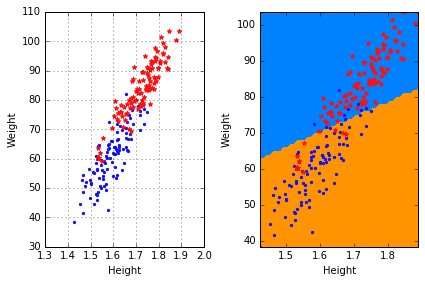

In [11]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    mse, w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [12]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    return np.exp(t) / (1 + np.exp(t))

In [13]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    loss = np.sum(np.log(1+np.exp(np.dot(tx,w))) - np.dot(y.T, np.dot(tx, w)))
    return loss

In [23]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    sig = sigmoid(np.dot(tx, w))
    print(sig.shape)
    print(y.shape)
    print(tx.T.shape)
    return np.dot(tx.T, (sig - y) )

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [20]:
def learning_by_gradient_descent(y, tx, w, alpha):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # compute the cost
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # compute the gradient
    gradient = calculate_gradient(y, tx, w)
    # ***************************************************
    # update w
    w = w - alpha * gradient
    return loss, w

Demo!

In [17]:
print(x.shape)
tx = np.c_[np.ones((y.shape[0], 1)), x]
print(tx.shape)

(200, 2)
(200, 3)


(200, 1)
(200, 1)
(3, 200)
Current iteration=0, the loss=138.62943611198904
(200, 1)
(200, 1)
(3, 200)
The loss=-4153.618220317766


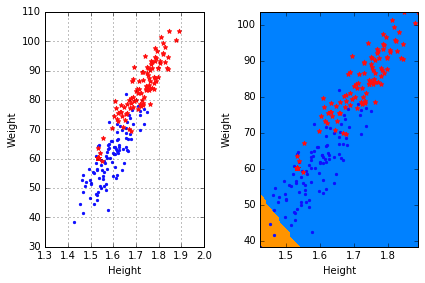

In [24]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 2
    threshold = 1e-8
    alpha = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
#     print(tx.shape)
#     print(y.shape)
#     print(w.shape)
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, alpha)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [ ]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # calculate hessian
    sig = sigmoid(np.dot(tx, w))
    s_nn = sig*(1-sig) #np.dot(sig.T, (1-sig))
    #print(s_nn[0,0])
#     print(s_nn.shape)
#     print(np.ndarray.flatten(s_nn))
    S = np.diag(np.ndarray.flatten(s_nn))
    #np.fill_diagonal(S, s_nn)
    #print(np.dot(tx.T, np.dot(S, tx)).shape)
    return np.dot(tx.T, np.dot(S, tx))

Write a function below to return loss, gradient, and hessian.

In [ ]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # return loss, gradient, and hessian
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton method
Use Newton method for logistic regression.

In [ ]:
def learning_by_newton_method(y, tx, w, alpha):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # return loss, gradient and hessian
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # ***************************************************
    # update w
    w = w - alpha * np.dot(np.linalg.inv(hessian), gradient)
    
    return loss, w

demo

In [ ]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, alpha)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # return loss, gradient, and hessian
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    loss_penalty = lambda_ * np.sum(np.power(w, 2))
    gradient_penalty = lambda_ * 2 * w
    return loss + loss_penalty, gradient + gradient_penalty, hessian

In [ ]:
def learning_by_penalized_gradient(y, tx, w, alpha, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # return loss, gradient and hessian
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # update w
    w = w - alpha * np.dot(np.linalg.inv(hessian), gradient)
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    lambda_ = 0.6
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, alpha, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}, w={w}".format(i=iter, l=loss, w=w))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)